In [23]:
from collections import namedtuple
import hashlib
import os
from os.path import join as joinpath, exists as pathexists
import pickle
import sys
import warnings

import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from matplotlib.pylab import cm
from matplotlib.cbook import mplDeprecation
from mpl_toolkits.basemap import Basemap
import numpy as np
import xarray as xr


%matplotlib inline

/home/samuel/miniconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [197]:
results_dir='/home/samuel/data/drift_tool_test/salish_test_20170416/output/'
# Use glob to find all netcdf files in results_dir
files = glob.glob(os.path.join(results_dir, '*133_1491850385.nc'))

In [198]:
files

['/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishseacast_ar_2017042000_P1D-133_1491850385.nc',
 '/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishseacast_ar_2017041900_P1D-133_1491850385.nc']

In [98]:
file = files[0]
# Open dataset
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:       (time: 129)
Coordinates:
  * time          (time) datetime64[ns] 2017-04-20T00:09:42.000002 ...
Data variables:
    obs_lat       (time) float64 48.34 48.34 48.34 48.34 48.34 48.33 48.33 ...
    obs_lon       (time) float64 -123.5 -123.5 -123.5 -123.5 -123.5 -123.5 ...
    mod_lat       (time) float64 48.34 48.34 48.34 48.34 48.34 48.34 48.34 ...
    mod_lon       (time) float64 -123.5 -123.5 -123.5 -123.5 -123.5 -123.5 ...
    obs_offShore  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    liu           (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    molcard       (time) float64 0.0 0.0 0.0 0.0 0.04011 0.08022 0.05331 ...
    sep           (time) float64 173.1 348.8 518.9 677.6 842.2 977.1 ...
    obs_dist      (time) float64 0.0 226.8 221.0 210.0 221.3 188.1 185.6 ...
    obs_disp      (time) float64 0.0 227.1 448.2 658.1 877.4 1.062e+03 ...
    mod_dist      (time) float64 0.0 51.88 51.62 51.53 54.21 49.2 41.02 .

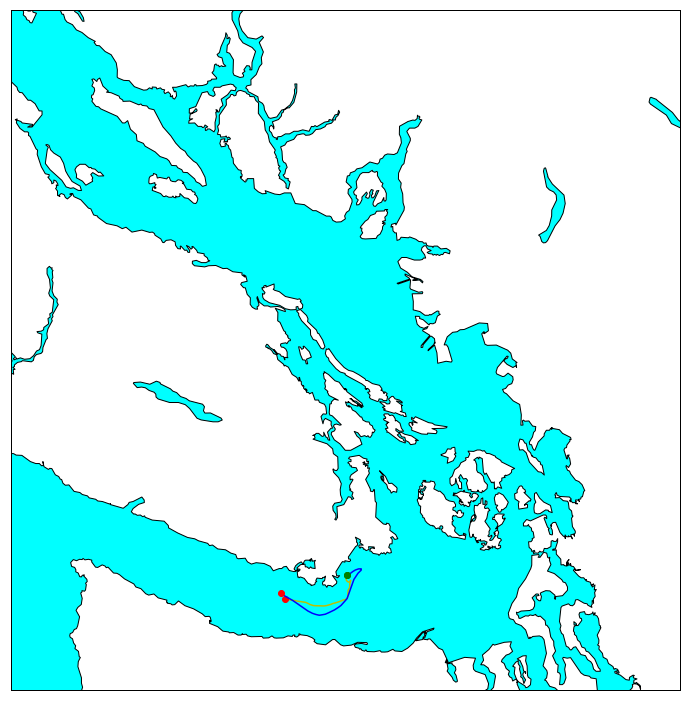

In [99]:
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='merc',
            resolution='h',llcrnrlon=-125,llcrnrlat=48,urcrnrlon=-122,urcrnrlat=50)
# draw coastlines.
plt.rcParams['figure.figsize'] = [12, 17]
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua') 
# fill continents, set lake color same as ocean color. 
m.fillcontinents(color='white',lake_color='aqua')


x, y = m(ds.obs_lon.values, ds.obs_lat.values)
j,k = m(ds.mod_lon.values, ds.mod_lat.values)
m.plot(x, y, c='y', label='observations')
m.plot(x[0], y[0], 'go')
m.plot(x[-1], y[-1], 'ro')
m.plot(j, k, c='b', label='model')
m.plot(j[0], k[0], 'go')
m.plot(j[-1], k[-1], 'ro')
plt.show()


In [77]:
file = files[1]
# Open dataset
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:       (time: 101)
Coordinates:
  * time          (time) datetime64[ns] 2017-04-20T00:08:31.000004 ...
Data variables:
    obs_lat       (time) float64 49.51 49.51 49.51 49.52 49.52 49.52 49.52 ...
    obs_lon       (time) float64 -124.0 -124.0 -124.0 -124.0 -124.0 -124.0 ...
    mod_lat       (time) float64 49.51 49.51 49.51 49.51 49.51 49.52 49.52 ...
    mod_lon       (time) float64 -124.0 -124.0 -124.0 -124.0 -124.0 -124.0 ...
    obs_offShore  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    liu           (time) float64 0.0 0.1047 0.389 0.3717 0.3065 0.2076 ...
    molcard       (time) float64 0.0 0.5631 0.788 0.7865 0.7793 0.7733 ...
    sep           (time) float64 167.6 160.5 174.8 259.6 357.0 449.9 518.5 ...
    obs_dist      (time) float64 0.0 366.4 456.7 390.5 400.6 366.4 293.3 ...
    obs_disp      (time) float64 0.0 367.3 824.7 1.216e+03 1.618e+03 ...
    mod_dist      (time) float64 0.0 313.8 335.4 296.0 316.5 314.3 268.7 ...


In [153]:
def plot_file(fname):
    """Plot the modelled and observed trajector in a file fname"""
    m = Basemap(width=12000000,height=9000000,projection='merc',resolution='h',llcrnrlon=-125,llcrnrlat=48,urcrnrlon=-122,urcrnrlat=50)
    ds = xr.open_dataset(fname)
    m.drawcoastlines()
    plt.rcParams['figure.figsize'] = [12, 17]
    x, y = m(ds.obs_lon.values, ds.obs_lat.values)
    j,k = m(ds.mod_lon.values, ds.mod_lat.values)
    m.plot(x, y, c='y', label='observations')
    m.plot(x[0], y[0], 'go')
    m.plot(x[-1], y[-1], 'ro')
    m.plot(j, k, c='b', label='model')
    m.plot(j[0], k[0], 'go')
    m.plot(j[-1], k[-1], 'ro')
    ds.close()


    

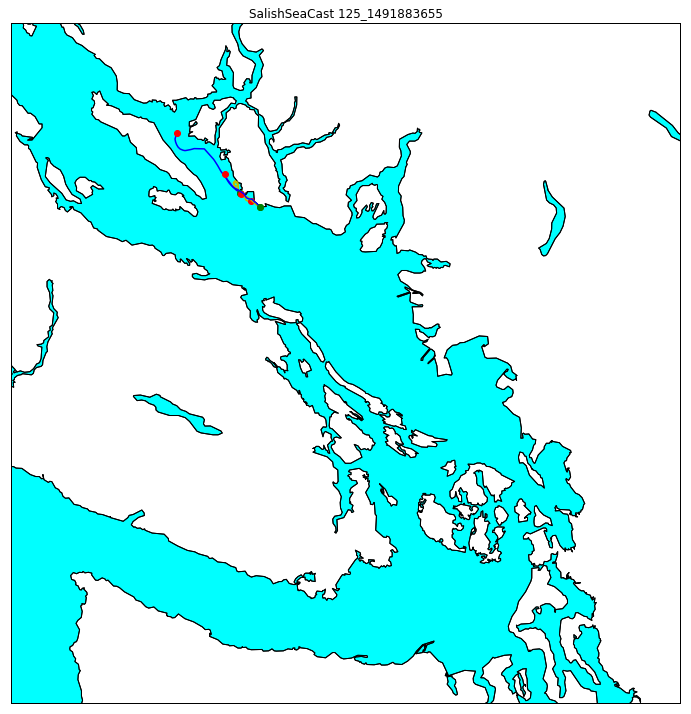

In [215]:
plt.rcParams['figure.figsize'] = [12, 17]

# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
plt.title('{} {}'.format(ds.ocean_model, ds.obs_buoyid))
# fill continents, set lake color same as ocean color. 
m.fillcontinents(color='white',lake_color='aqua')
unique_ids = "125_1491883655"
if ds.obs_unique_id == unique_ids:
    for file in files:
        plot_file(file)

[]

In [203]:
print(ds.obs_unique_id)

125_1491883655
